In [11]:
"""
参考リスト
http://qiita.com/neriai/items/448a36992e308f4cabe2
-> 例としてわかりやすかったので上記記事を参考にした。
"""
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 画像の読み込み元の指定
input_path = "./origin/apple.jpg"
output_cropped = "./output/apple_"
output_path = "./output/apple.jpg"

# 画像を読込
src = cv2.imread(input_path, cv2.IMREAD_COLOR)

# グレースケール画像へ変換
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 2値化
retval, bw = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 輪郭を抽出
#   contours : [領域][Point No][0][x=0, y=1]
#   cv2.CHAIN_APPROX_NONE: 中間点も保持する
#   cv2.CHAIN_APPROX_SIMPLE: 中間点は保持しない
image, contours, hierarchy = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [13]:
# 矩形検出された数（デフォルトで0を指定）
detect_count = 0

# 各輪郭に対する処理
for i in range(0, len(contours)):

    # 輪郭の領域を計算
    area = cv2.contourArea(contours[i])

    # ノイズ（小さすぎる領域）と全体の輪郭（大きすぎる領域）を除外
    if area < 1e2 or 1e5 < area:
        continue

    # 外接矩形
    if len(contours[i]) > 0:
        rect = contours[i]
        x, y, w, h = cv2.boundingRect(rect)
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # 外接矩形毎に画像を保存
        cv2.imwrite(output_cropped + str(detect_count) + '.jpg', src[y:y + h, x:x + w])

        detect_count = detect_count + 1
cv2.imwrite(output_path, src)

True

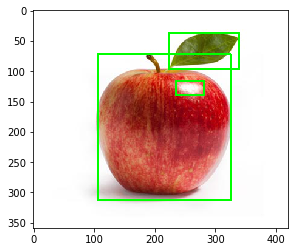

In [14]:
# 処理前画像の貼り付け
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
# 処理前画像の表示
plt.show()